### Libraries

In [80]:
# import required libraries
import os
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import seaborn as sns

### Reading shots data

In [47]:
bl_shots = pd.read_csv('data/bundesliga/shots.csv')
epl_shots = pd.read_csv('data/epl/shots.csv')
lal_shots = pd.read_csv('data/laliga/shots.csv')
l1_shots = pd.read_csv('data/ligue1/shots.csv')
ser_shots = pd.read_csv('data/seriea/shots.csv')

In [48]:
bl_shots['tag_id'] = bl_shots['tag_id'].apply(ast.literal_eval)
bl_shots['tag_name'] = bl_shots['tag_name'].apply(ast.literal_eval)

epl_shots['tag_id'] = epl_shots['tag_id'].apply(ast.literal_eval)
epl_shots['tag_name'] = epl_shots['tag_name'].apply(ast.literal_eval)

lal_shots['tag_id'] = lal_shots['tag_id'].apply(ast.literal_eval)
lal_shots['tag_name'] = lal_shots['tag_name'].apply(ast.literal_eval)

l1_shots['tag_id'] = l1_shots['tag_id'].apply(ast.literal_eval)
l1_shots['tag_name'] = l1_shots['tag_name'].apply(ast.literal_eval)

ser_shots['tag_id'] = ser_shots['tag_id'].apply(ast.literal_eval)
ser_shots['tag_name'] = ser_shots['tag_name'].apply(ast.literal_eval)


In [4]:
# concatenate
shots_list = [bl_shots, epl_shots, lal_shots, l1_shots, ser_shots]

shots = pd.DataFrame()
for i in shots_list:
    shots = pd.concat([shots, i])

In [5]:
shots.shape

(40461, 14)

In [7]:
shots.head()

,game_id,period_id,team_id,player_id,type_id,type_name,subtype_id,subtype_name,tag_id,tag_name,x_start,y_start,x_end,y_end
0,2516739,1,2444,209091,10,shot,100,shot,"[402, 201, 1206, 1801]","['right foot', 'opportunity', 'position: goal ...",83,66,0.0,0.0
1,2516739,1,2444,134383,10,shot,100,shot,"[101, 403, 201, 1205, 1801]","['goal', 'head/body', 'opportunity', 'position...",95,59,0.0,0.0
2,2516739,1,2446,105619,10,shot,100,shot,"[402, 201, 1201, 1801]","['right foot', 'opportunity', 'position: goal ...",91,66,100.0,100.0
3,2516739,1,2446,14786,10,shot,100,shot,"[402, 201, 1212, 1802]","['right foot', 'opportunity', 'position: out l...",88,49,100.0,100.0
4,2516739,1,2444,20475,10,shot,100,shot,"[402, 1216, 1802]","['right foot', 'position: out high right', 'no...",74,42,0.0,0.0


### Analyse shots by league

### Bundesliga

Firs of all, we need to identify if a shot results into a goal or not.

In [ ]:
bl_player_names = pd.read_csv('data/bundesliga/player_names.csv')
bl_team_names = pd.read_csv('data/bundesliga/team_names.csv').loc[:, ['team_id', 'team_name_short']]
#name_id_mappings = dict(zip(bl_player_names['player_id'], bl_player_names['nickname']))

bl_shots = bl_shots.merge(bl_player_names, on = 'player_id', how = 'left')
bl_shots = bl_shots.merge(bl_team_names, on = 'team_id', how = 'left')

In [66]:
shot_outcomes = bl_shots['tag_id'].apply(lambda x: 1 if 101 in x else 0)
bl_shots['shot_outcomes'] = shot_outcomes

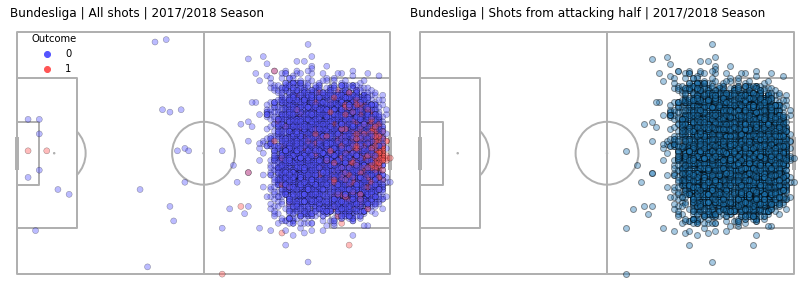

In [247]:

# Visual shots on Pitch
pitch = Pitch(pitch_type='wyscout')  
fig, ax = pitch.draw(nrows = 1, ncols = 2, figsize=(12, 12))
#ax[0].scatter(bl_shots['x_start'], bl_shots['y_start'], edgecolor = 'black', 
#           alpha = 0.4, c = bl_shots['shot_outcomes'])


sns.scatterplot(data = bl_shots, x = 'x_start', y = 'y_start', ax = ax[0], 
                hue = 'shot_outcomes', palette = 'seismic', edgecolor = 'black', alpha = 0.4)

ax[0].legend(title = 'Outcome', frameon = False, bbox_to_anchor = (0.0395, 0.77))

ax[0].set_title('Bundesliga | All shots | 2017/2018 Season', x = 0.33, y = 1)

#dataset with filtered out shots
new_bl_shots = bl_shots[~((bl_shots['x_start'] > 0) & (bl_shots['x_start'] < 50) &  
          (bl_shots['y_start'] < 100) & (bl_shots['y_start'] > 0))]

ax[1].scatter(new_bl_shots['x_start'], new_bl_shots['y_start'], edgecolor = 'black', alpha = 0.4)
ax[1].set_title('Bundesliga | Shots from attacking half | 2017/2018 Season', x = 0.45, y = 1)

plt.show()

18 shots from own half are removed from the dataset. Although the direction of play is from left to right, it means that there are too many shots (8 !) from the penalty area of attacking team. Since both teams attack in the same direction, this could be a result of unflipped coordinate when tagging some of attacking team shots. In addition, even if this is a shot, these can largely skew model results. We will evaluate the impact of other outliers that are also present in the right half of the field when evaluating model.